# The Lost Liquidity 

- *Do you know a lot of trades never reach the stock exchange?* 
- *Do you know how stock trading platform generates profits?* 
- *Do you know the best buy/sell price you see on stock trading platforms are not actually the best price?* 

## Background 

To best understand the objectives and steps in the following analysis, it is important to first understand the trade mechanism and specifically, interactions of retail traders, retail brokers, and wholesaler in the US securities market. 

**Odd lot** trades are defined as trades with less than 100 shares at once; **round lot** trades are trades with more than 100 shares on the contrary.  Odd lots are mostly from retail traders due to budget limit and other restrictions.  When a retail trader (like any of us) submits an odd-lot order, to a retail broker (e.g. Robinhood), the order is internalized to wholesalers as the latter prefer trades from uninformed traders. 

Wholesalers, in exchange for order flow, provide retail brokers with slightly better prices than **national best bid/offer (NBBO)**, which can be regarded as the best prices for round lots nationwide. The payment for order flow from wholesalers stands for the largest reveune source of a typical retail broker. Retail brokers then give NBBO when retail traders are using their platform, earning the implicit difference between prices offered by wholesalers and prices providing for retail traders. 

Therefore, a trade may never arrive the exchange but be internalized in such cycle. 

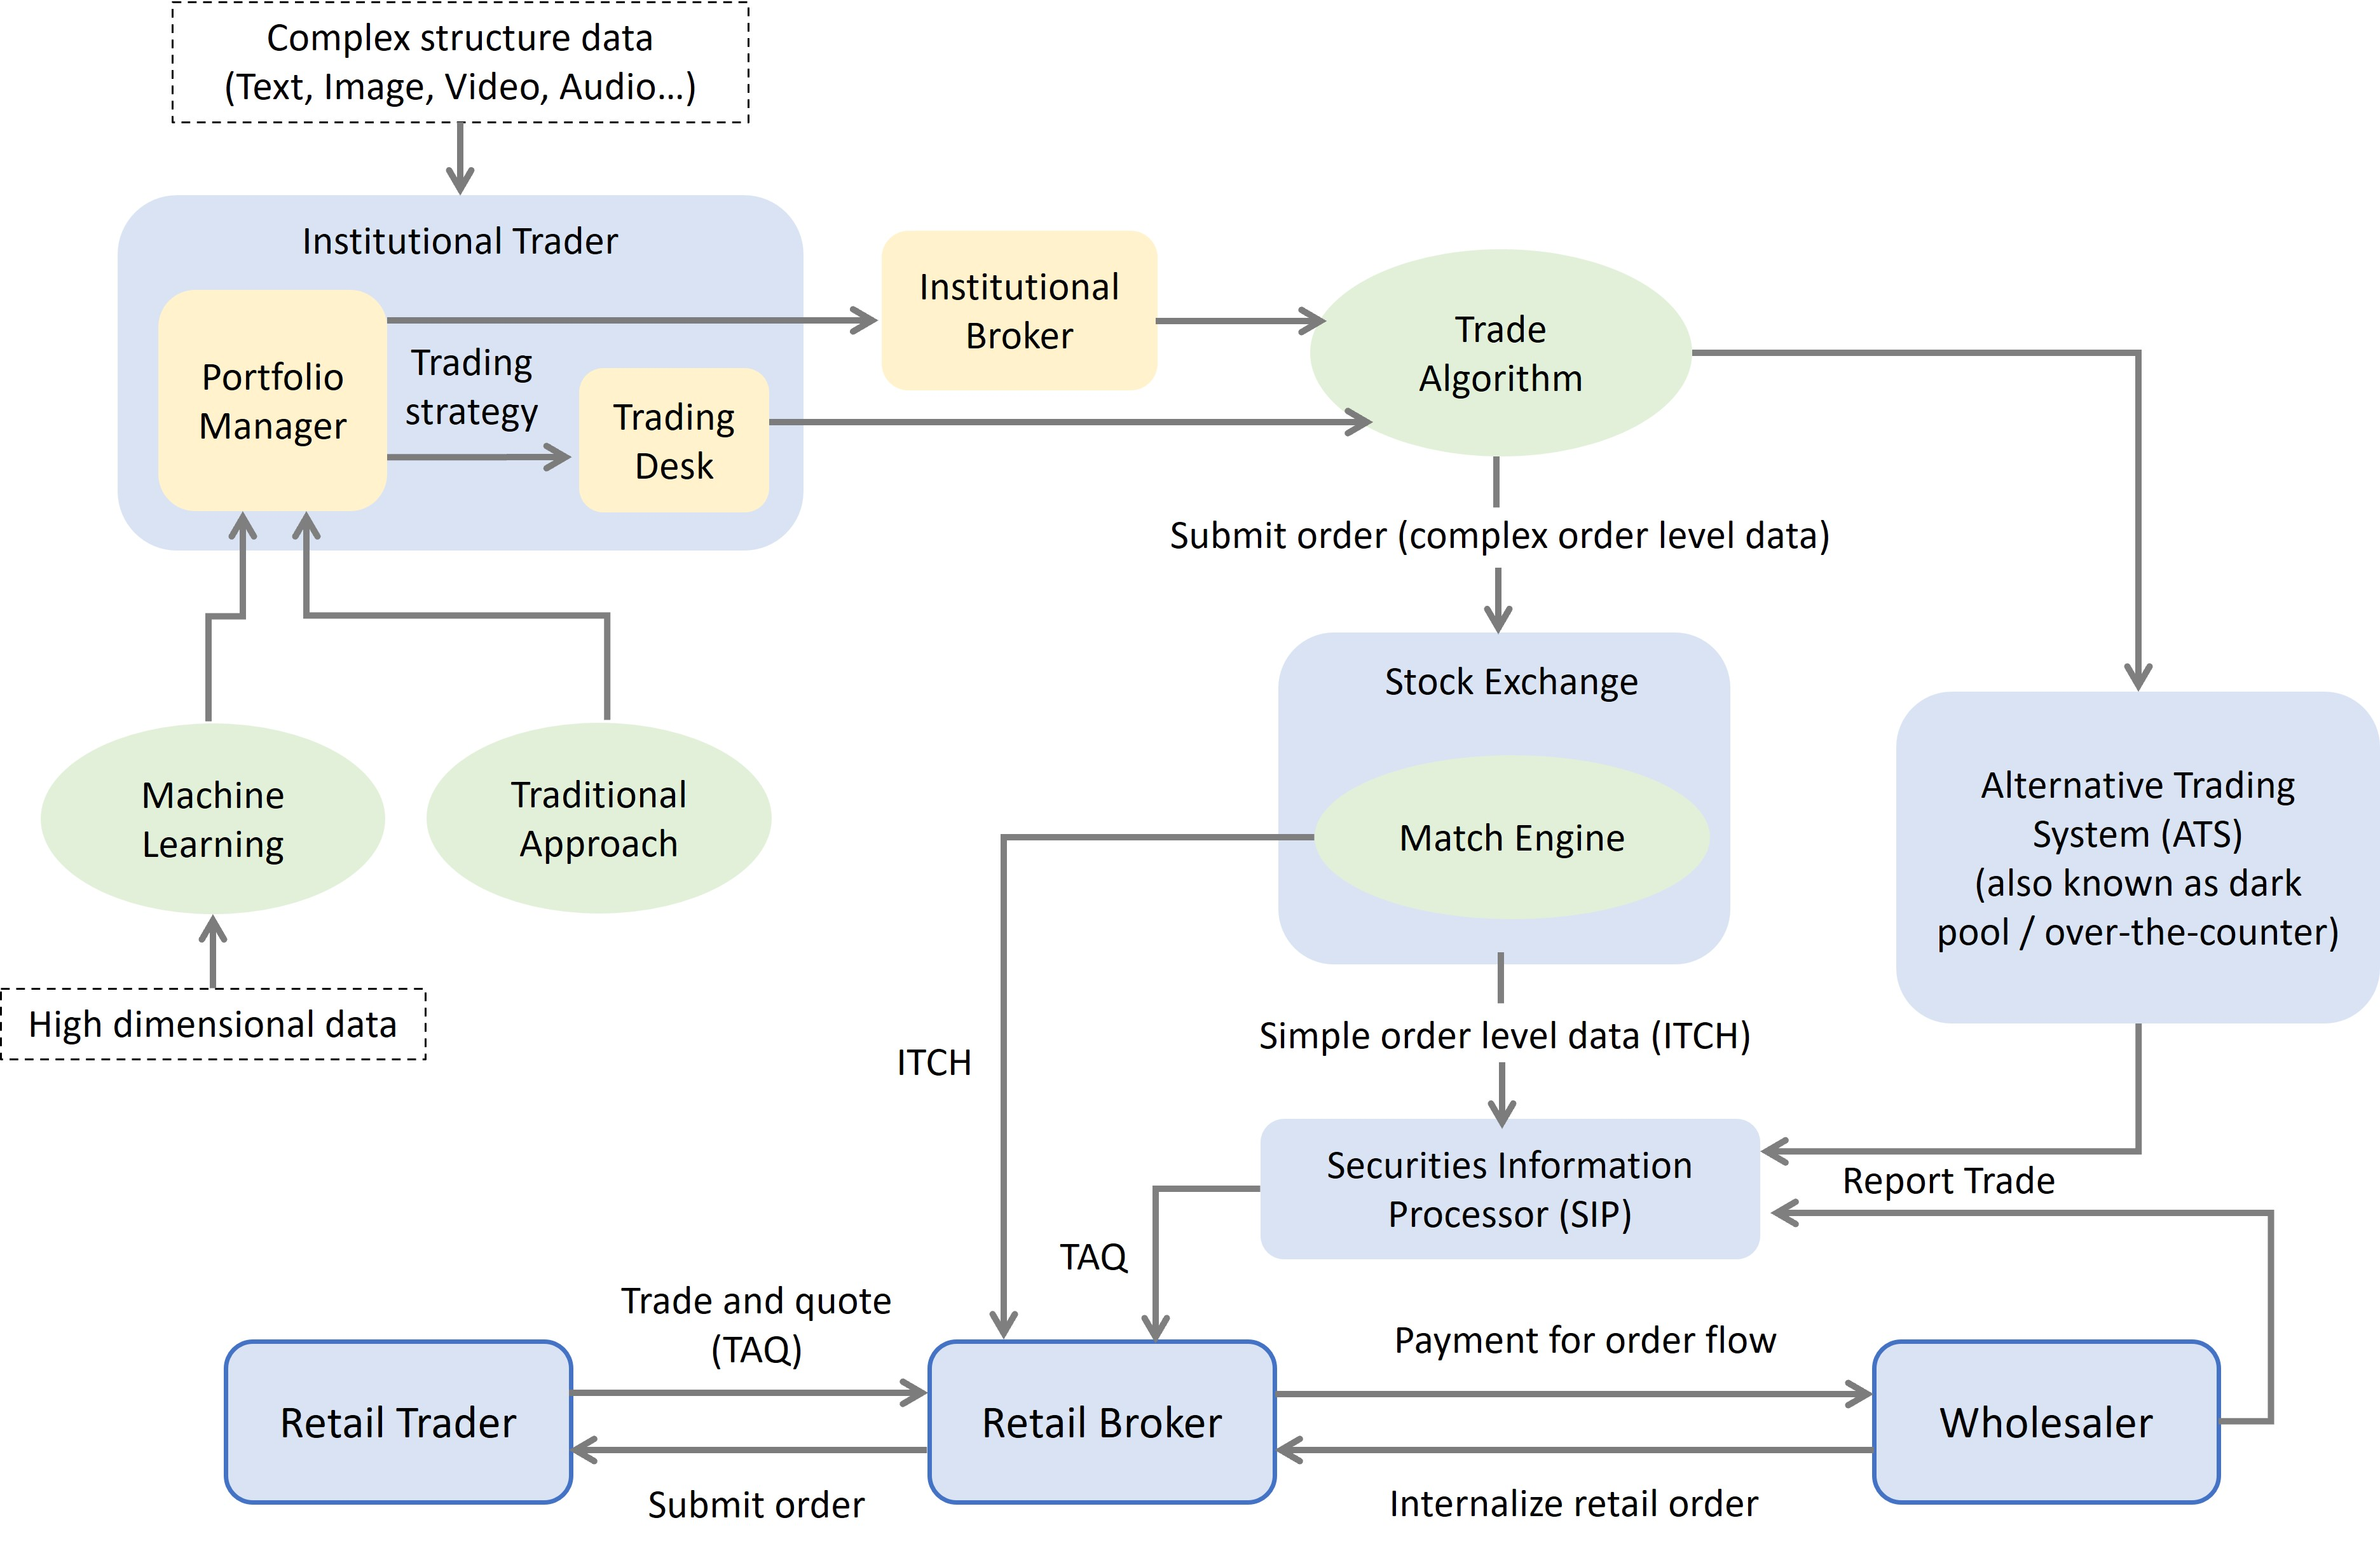

*The current market system in the United States (O'Hara, et al, 2014)*

## Objectives 


In this project I am trying to answer these questions: 

1. **What are the differences between odd lot spread and round lot spread? What might cause such differences?**

1. **How long during the day is an odd-lot spread better (smaller) than a round-lot spread?**

1. **How long during the day is odd-lot spread better (smaller) than NBBO spread?**

1. **If retail brokers take all the difference between NBBO spread and odd-lot spread, how much can they take from retail traders in an "injustice" way?**

## Data

### There are two main datasources used in this project: 

- **core data (trade-and-quote TAQ)**: contains more trade information than proprietary data
- **proprietary data (ITCH from NASDAQ)**: contains NBBO price and trade price  

The data was retrieved from the Wharton Research Data Services https://wrds-www.wharton.upenn.edu/ 

Core and proprietary data of Amazon and Microsft data on December 31, 2019 was used in this project, as we aim mostly at the demonstration of analytical methods. A larger dataset can be used to drive more holistic insights. 

### You will be seeing the following datasets in the content: 

- **lob_amzn** : TAQ data for Amazon on limit order book, which contains round lots and odd lots from retail traders
- **lob_msft** : TAQ data for Microsoft on limit order book, which contains round lots and odd lots from retail traders
- **amzn_nbbo** : proprietary data for Amazon, which contains NBBO price 
- **msft_nbbo** : proprietary data for Microsoft, which contains NBBO price
- **amzn_trade** : proprietary data for Amazon, which contains trade price 
- **msft_trade** : proprietary data for Microsoft, which contains trade price


The datasets were preprocessed for tidiness and simplicity. 

### You will see the following variable in the datasets: 

- **TIME**: Time
- **DATE**: Date
- **SYM_ROOT**: share code 
- **SIZE**: Number of shares of the trade
- **PRICE**: Trade price of the stock accepted by buyers and sellers 
- **BEST_BID**: National best bid price
- **BEST_ASK**: National best ask price
- **OBBP**: Odd lot best bid price
- **OBBS**: Odd lot best bid share
- **OBOP**: Odd lot best offer price
- **OBOS**: Odd lot best offer share
- **RBBP**: Round lot best bid price
- **RBBS**: Round lot best bid share
- **RBOP**: Round lot best offer price
- **RBOS**: Round lot best offer share


### You will see some newly created variables: 

- **OLS**: Odd lot spread
- **RLS**: Round lot spread
- **NBBO_SPREAD**: National best bid/offer spread
- **TIME_DIFF**: time interim between a trade and its previous occurred trade
- **DURATION**: the time duration which odd lot spread is smaller than NBBO

-----

## Part I 

1. **What are the differences between odd lot spread and round lot spread? What might cause such differences?**

1. **How long during the day is an odd-lot spread better (smaller) than a round-lot spread?**

### Load & Clean Data

In [9]:
import pandas as pd
import numpy as np

In [51]:
amzn_trade = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/amzn_trade.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')
msft_trade = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/msft_trade.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')
lob_amzn = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/lob_amzn_123119.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')
lob_msft = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/lob_msft_123119.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')
msft_nbbo = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/msft_nbbo.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')
amzn_nbbo = pd.read_sas("C:/cindy/year5 CUHK/FINA4430/project 3/amzn_nbbo.sas7bdat", format = 'sas7bdat', encoding = 'latin-1')

In [52]:
amzn_trade.head()

,DATE,time,SYM_ROOT,SIZE,PRICE
0,2019-12-31,34200.002461,AMZN,100.0,1841.79
1,2019-12-31,34200.003830,AMZN,76.0,1841.79
2,2019-12-31,34200.003969,AMZN,24.0,1841.79
3,2019-12-31,34200.004573,AMZN,24.0,1841.79
4,2019-12-31,34200.016124,AMZN,76.0,1841.79


In [53]:
amzn_nbbo.head()

,DATE,time,SYM_ROOT,BEST_BID,BEST_ASK
0,2019-12-31,34200.002462,AMZN,1839.00,1842.0
1,2019-12-31,34200.002759,AMZN,1841.79,1842.0
2,2019-12-31,34200.003832,AMZN,1839.00,1842.0
3,2019-12-31,34200.004131,AMZN,1841.79,1842.0
4,2019-12-31,34200.004572,AMZN,1840.00,1842.0


In [54]:
lob_amzn

,OBBP,OBBS,RBBP,RBBS,OBOP,OBOS,RBOP,RBOS,time
0,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002437
1,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002524
2,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002551
3,1841.79,100.0,1841.79,100.0,1842.00,1.0,1844.47,100.0,34200.002741
4,1841.79,100.0,1841.79,100.0,1842.00,1.0,1844.47,100.0,34200.003202
...,...,...,...,...,...,...,...,...,...
359286,1846.90,613.0,1846.90,613.0,1847.64,739.0,1847.64,739.0,57599.994231
359287,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.994247
359288,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.999232
359289,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.999417


In [55]:
# Rename column for consistency 
amzn_trade = amzn_trade.rename({'time': 'TIME'}, axis=1)
msft_trade = msft_trade.rename({'time': 'TIME'}, axis=1)
amzn_nbbo = amzn_nbbo.rename({'time': 'TIME'}, axis=1)
msft_nbbo = msft_nbbo.rename({'time': 'TIME'}, axis=1)
lob_amzn = lob_amzn.rename({'time': 'TIME'}, axis=1)
lob_msft = lob_msft.rename({'time': 'TIME'}, axis=1)

In [56]:
lob_amzn

,OBBP,OBBS,RBBP,RBBS,OBOP,OBOS,RBOP,RBOS,TIME
0,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002437
1,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002524
2,1840.99,16.0,1839.00,100.0,1842.00,1.0,1844.47,100.0,34200.002551
3,1841.79,100.0,1841.79,100.0,1842.00,1.0,1844.47,100.0,34200.002741
4,1841.79,100.0,1841.79,100.0,1842.00,1.0,1844.47,100.0,34200.003202
...,...,...,...,...,...,...,...,...,...
359286,1846.90,613.0,1846.90,613.0,1847.64,739.0,1847.64,739.0,57599.994231
359287,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.994247
359288,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.999232
359289,1846.90,613.0,1846.90,613.0,1847.64,1159.0,1847.64,1159.0,57599.999417


### Calculate the statistics of OLS and RLS (Amazon)

In [57]:
# OLS = OBOP – OBBP
# RLS = RBOP – RBBP
lob_amzn["OLS"] = lob_amzn["OBOP"] - lob_amzn["OBBP"]
lob_amzn["RLS"] = lob_amzn["RBOP"] - lob_amzn["RBBP"]

In [60]:
print("Odd lot spread mean:", lob_amzn["OLS"].mean())
print("Odd lot spread standard deviation:", lob_amzn["OLS"].std())
print("Round lot spread mean:", lob_amzn["RLS"].mean())
print("Round lot standard deviation:", lob_amzn["RLS"].std())

Odd lot spread mean: 0.5937939441845784
Odd lot spread standard deviation: 0.3999774196247843
Round lot spread mean: 0.8665714977551986
Round lot standard deviation: 0.4749002750890083


### Sum up the time intervals which RLS > OLS

In [62]:
lob_amzn["TIME_DIFF"] = lob_amzn["TIME"] - lob_amzn["TIME"].shift(1)
lob_amzn["DURATION"] = np.nan
for i in range(0,359291): 
    if lob_amzn["RLS"][i] > lob_amzn["OLS"][i]:
        lob_amzn["DURATION"][i] = lob_amzn["TIME_DIFF"][i]
    else: lob_amzn["DURATION"][i] = 0

In [64]:
duration = lob_amzn["DURATION"].sum()

import datetime
 
def convert(n):
    return str(datetime.timedelta(seconds = n))
     
print(convert(duration))

5:35:16.941991


For Amazon stock, odd lot spread was better than round lot spread for around 5 hours and 35 min on December 31st, 2019.


I repeated the same process for Microsoft datasets.

### Calculate the statistics of OLS and RLS (Microsoft)

In [67]:
# check the number of rows
lob_msft

,OBBP,OBBS,RBBP,RBBS,OBOP,OBOS,RBOP,RBOS,TIME,OLS,RLS
0,156.85,1482.0,156.85,1482.0,157.00,10.0,157.20,1570.0,34200.007512,0.15,0.35
1,156.85,1482.0,156.85,1482.0,157.00,10.0,157.20,1570.0,34200.007557,0.15,0.35
2,156.85,1482.0,156.85,1482.0,157.10,4.0,157.20,1570.0,34200.008739,0.25,0.35
3,156.85,1482.0,156.85,1482.0,157.10,4.0,157.20,1570.0,34200.015746,0.25,0.35
4,156.85,1482.0,156.85,1482.0,157.10,4.0,157.20,1570.0,34200.015746,0.25,0.35
...,...,...,...,...,...,...,...,...,...,...,...
1142214,157.48,800.0,157.48,800.0,157.52,5473.0,157.52,5473.0,57599.979315,0.04,0.04
1142215,157.48,800.0,157.48,800.0,157.52,5473.0,157.52,5473.0,57599.979318,0.04,0.04
1142216,157.48,800.0,157.48,800.0,157.52,5473.0,157.52,5473.0,57599.995176,0.04,0.04
1142217,157.48,800.0,157.48,800.0,157.52,5473.0,157.52,5473.0,57599.995815,0.04,0.04


In [65]:
lob_msft["OLS"] = lob_msft["OBOP"] - lob_msft["OBBP"]
lob_msft["RLS"] = lob_msft["RBOP"] - lob_msft["RBBP"]

In [66]:
print("Odd lot spread mean:", lob_msft["OLS"].mean())
print("Odd lot spread standard deviation:", lob_msft["OLS"].std())
print("Round lot spread mean:", lob_msft["RLS"].mean())
print("Round lot standard deviation:", lob_msft["RLS"].std())

Odd lot spread mean: 0.01290998486301775
Odd lot spread standard deviation: 0.006208143482981924
Round lot spread mean: 0.01405417875229917
Round lot standard deviation: 0.007110341854187532


### Sum up the time intervals in which OLS < RLS

In [71]:
lob_msft["TIME_DIFF"] = lob_msft["TIME"] - lob_msft["TIME"].shift(1)
lob_msft["DURATION"] = np.nan
for i in range(0,1142219): 
    if lob_msft["RLS"][i] > lob_msft["OLS"][i]:
        lob_msft["DURATION"][i] = lob_msft["TIME_DIFF"][i]
    else: lob_msft["DURATION"][i] = 0

In [73]:
duration_m = lob_msft["DURATION"].sum()
  
print(convert(duration_m))

0:44:17.913099


For Microsoft stock, odd lot spread was better than round lot spread for around 44 min on December 31st, 2019.

## Part I Conclusion 


 **1. What are the differences between odd lot spread and round lot spread? What might cause such differences?**
 
 **2. How long during the day is an odd-lot spread better (smaller) than a round-lot spread?**

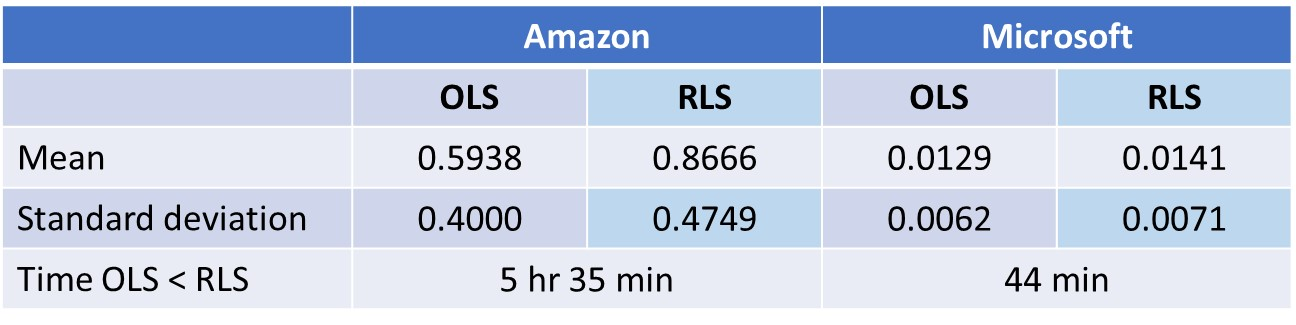

**For both shares, the mean and standard deviation of odd lot spread are smaller than that of the round lots spreads**

**Mean**

Generally speaking, it is more difficult to trade at large size than at small size, as there may not be sufficient liquidity on both buy/sell sides. Therefore, it is harder to trade at round lots than at odd lots. (A round lot means a trade of over 100 shares.)

In order to make a large transaction, prices are conpensated. That is, round lot trades at less ideal prices (higher buy price and lower sell price) relative to NBBO, which explains why the mean of round lot spreads is larger than one of odd lot spreads.

The size of spread and its mean is affected by market depth. When the market is deep, the price to buy/sell at large quantity will be close to NBBO, and vice versa.


**Standard deviation**

Round lots take up orders at more price levels in the limit order book (LOB), because the trading quantity is larger than odd lots. When the market depth is higher, the round-lot spreads are smaller. However, since it eats up more market liquidity than odd lots, the market depth drops more and it takes more time to restore the liquidity. The round-lot spreads will widen a lot at that time, leading to higher variation of round-lot spreads.

----

## Part II

3. **How long during the day is odd-lot spread better (smaller) than NBBO spread?**

### Calculate the statistics of NBBO Spread

In [74]:
amzn_nbbo["NBBO_SPREAD"] = amzn_nbbo["BEST_ASK"] - amzn_nbbo["BEST_BID"]
print("Amazon NBBO spread mean:", amzn_nbbo["NBBO_SPREAD"].mean())
print("Amazon NBBO spread standard deviation:", amzn_nbbo["NBBO_SPREAD"].std())

Amazon NBBO spread mean: 0.62052519629529
Amazon NBBO spread standard deviation: 0.32617714621359595


In [87]:
msft_nbbo["NBBO_SPREAD"] = msft_nbbo["BEST_ASK"] - msft_nbbo["BEST_BID"]
print("Microsoft NBBO spread mean:", msft_nbbo["NBBO_SPREAD"].mean())
print("Microsoft NBBO spread standard deviation:", msft_nbbo["NBBO_SPREAD"].std())

Microsoft NBBO spread mean: 0.011273642481066864
Microsoft NBBO spread standard deviation: 0.004457510356557426


### Merge datasets and transform data (Amazon)

In [76]:
lob_amzn.head()

,OBBP,OBBS,RBBP,RBBS,OBOP,OBOS,RBOP,RBOS,TIME,OLS,RLS,TIME_DIFF,DURATION
0,1840.99,16.0,1839.00,100.0,1842.0,1.0,1844.47,100.0,34200.002437,1.01,5.47,NaN,NaN
1,1840.99,16.0,1839.00,100.0,1842.0,1.0,1844.47,100.0,34200.002524,1.01,5.47,0.000087,0.000087
2,1840.99,16.0,1839.00,100.0,1842.0,1.0,1844.47,100.0,34200.002551,1.01,5.47,0.000026,0.000026
3,1841.79,100.0,1841.79,100.0,1842.0,1.0,1844.47,100.0,34200.002741,0.21,2.68,0.000190,0.000190
4,1841.79,100.0,1841.79,100.0,1842.0,1.0,1844.47,100.0,34200.003202,0.21,2.68,0.000461,0.000461


In [77]:
amzn_nbbo.head()

,DATE,TIME,SYM_ROOT,BEST_BID,BEST_ASK,NBBO_SPREAD
0,2019-12-31,34200.002462,AMZN,1839.00,1842.0,3.00
1,2019-12-31,34200.002759,AMZN,1841.79,1842.0,0.21
2,2019-12-31,34200.003832,AMZN,1839.00,1842.0,3.00
3,2019-12-31,34200.004131,AMZN,1841.79,1842.0,0.21
4,2019-12-31,34200.004572,AMZN,1840.00,1842.0,2.00


In [79]:
# merge two datasets by time
lob_amzn1 = lob_amzn[["TIME","OLS"]]
amzn_nbbo1 = amzn_nbbo[["TIME", "NBBO_SPREAD"]]
amzn = pd.merge(lob_amzn1,amzn_nbbo1, on = "TIME", how = "outer")

# sort values by time
amzn.sort_values(by = "TIME", inplace = True)
amzn

,TIME,OLS,NBBO_SPREAD
0,34200.002437,1.01,NaN
359291,34200.002462,NaN,3.00
1,34200.002524,1.01,NaN
2,34200.002551,1.01,NaN
3,34200.002741,0.21,NaN
...,...,...,...
441563,57599.994263,NaN,0.74
359288,57599.999232,0.74,NaN
441564,57599.999339,NaN,0.72
359289,57599.999417,0.74,NaN


In [80]:
amzn["TIME_DIFF"] = amzn["TIME"] - amzn["TIME"].shift(1)
amzn["DURATION"] = np.nan
amzn

,TIME,OLS,NBBO_SPREAD,TIME_DIFF,DURATION
0,34200.002437,1.01,NaN,NaN,NaN
359291,34200.002462,NaN,3.00,0.000024,NaN
1,34200.002524,1.01,NaN,0.000062,NaN
2,34200.002551,1.01,NaN,0.000026,NaN
3,34200.002741,0.21,NaN,0.000190,NaN
...,...,...,...,...,...
441563,57599.994263,NaN,0.74,0.000014,NaN
359288,57599.999232,0.74,NaN,0.004969,NaN
441564,57599.999339,NaN,0.72,0.000107,NaN
359289,57599.999417,0.74,NaN,0.000078,NaN


In [82]:
# reset index
amzn.reset_index(drop=True, inplace=True)


# compare OLS with the closest previous NBBO spread
amzn["OLS"].fillna(method="ffill", inplace = True)
amzn["NBBO_SPREAD"].fillna(method="ffill", inplace = True)
amzn

,TIME,OLS,NBBO_SPREAD,TIME_DIFF,DURATION
0,34200.002437,1.01,NaN,NaN,NaN
1,34200.002462,1.01,3.00,0.000024,NaN
2,34200.002524,1.01,3.00,0.000062,NaN
3,34200.002551,1.01,3.00,0.000026,NaN
4,34200.002741,0.21,3.00,0.000190,NaN
...,...,...,...,...,...
441560,57599.994263,0.74,0.74,0.000014,NaN
441561,57599.999232,0.74,0.74,0.004969,NaN
441562,57599.999339,0.74,0.72,0.000107,NaN
441563,57599.999417,0.74,0.72,0.000078,NaN


### Sum up time intervals in which OLS < NBBO Spread

In [83]:
for i in range(0,441565):
    if amzn["OLS"][i] < amzn["NBBO_SPREAD"][i]:
        amzn["DURATION"][i] = amzn["TIME_DIFF"][i]
    else:  amzn["DURATION"][i] = 0

amzn

,TIME,OLS,NBBO_SPREAD,TIME_DIFF,DURATION
0,34200.002437,1.01,NaN,NaN,0.000000
1,34200.002462,1.01,3.00,0.000024,0.000024
2,34200.002524,1.01,3.00,0.000062,0.000062
3,34200.002551,1.01,3.00,0.000026,0.000026
4,34200.002741,0.21,3.00,0.000190,0.000190
...,...,...,...,...,...
441560,57599.994263,0.74,0.74,0.000014,0.000000
441561,57599.999232,0.74,0.74,0.004969,0.000000
441562,57599.999339,0.74,0.72,0.000107,0.000000
441563,57599.999417,0.74,0.72,0.000078,0.000000


In [88]:
amzn_ols_smaller = amzn["DURATION"].sum()
print(convert(amzn_ols_smaller))

4:26:22.310168


For Amazon stock, odd lot spread was better than NBBO spread for around 4 hour 26 min on December 31st, 2019.

### Merge datasets and transform data (Microsoft)

In [88]:
# repeat the steps for microsoft

lob_msft1 = lob_msft[["TIME","OLS"]]
msft_nbbo1 = msft_nbbo[["TIME", "NBBO_SPREAD"]]
msft = pd.merge(lob_msft1,msft_nbbo1, on = "TIME", how = "outer")
msft.sort_values(by = "TIME", inplace = True)
msft["TIME_DIFF"] = msft["TIME"] - msft["TIME"].shift(1)
msft["DURATION"] = np.nan
msft.reset_index(drop=True, inplace=True)

msft["OLS"].fillna(method="ffill", inplace = True)
msft["NBBO_SPREAD"].fillna(method="ffill", inplace = True)

msft

,TIME,OLS,NBBO_SPREAD,TIME_DIFF,DURATION
0,34200.006364,NaN,0.15,NaN,NaN
1,34200.007512,0.15,0.15,0.001148,NaN
2,34200.007557,0.15,0.15,0.000045,NaN
3,34200.008739,0.25,0.15,0.001182,NaN
4,34200.015746,0.25,0.15,0.007007,NaN
...,...,...,...,...,...
1618201,57599.979315,0.04,0.04,0.000288,NaN
1618202,57599.979318,0.04,0.04,0.000003,NaN
1618203,57599.995176,0.04,0.04,0.015858,NaN
1618204,57599.995815,0.04,0.04,0.000639,NaN


### Sum up time intervals in which OLS < NBBO Spread

In [89]:
for i in range(0,1618206):
    if msft["OLS"][i] < msft["NBBO_SPREAD"][i]:
        msft["DURATION"][i] = msft["TIME_DIFF"][i]
    else:  msft["DURATION"][i] = 0

        
msft_ols_smaller = msft["DURATION"].sum()
print(convert(msft_ols_smaller))

0:15:05.949393


For Microsoft stock, odd lot spread was better than NBBO spread for around 15 min on December 31st, 2019.

## Part II Conclusion

**3. How long during the day is odd-lot spread better (smaller) than NBBO spread?**


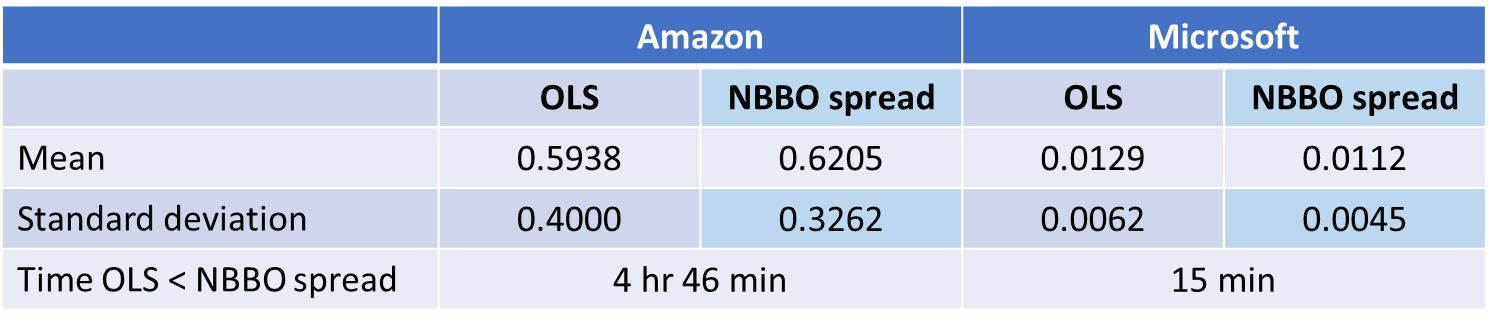

**For both shares, OLS has larger mean and smaller standard deviation than NBBO spread**


**Mean**

The larger mean of OLS is resulted from the price improvements (lower ask and higher bid price) wholesaler gives to retail brokers in exchange for uninformed trades (trades from retail traders). 

----

## Part III

4. **If retail brokers take all the difference between NBBO spread and odd-lot spread, how much can they take from retail traders in an "injustice" way?**


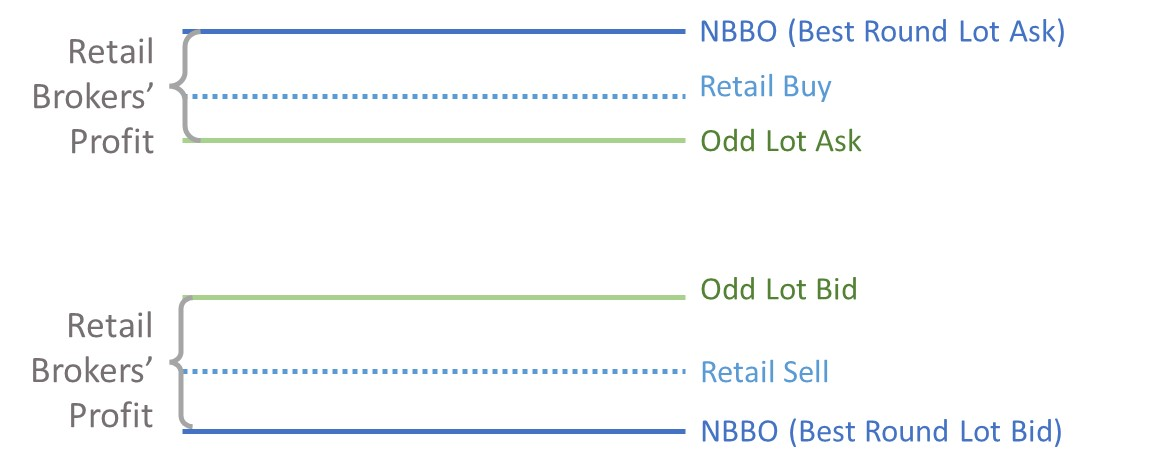

*Retail traders buys at a price between odd lot ask and best round lot ask, and sells at a price between odd lot bid and best round lot bid.*

### Merge datasets and transform data (Amazon)

In [107]:
# include "size" into the dataset to measure profit 
lob_amzn2 = lob_amzn[["TIME","OLS"]]
amzn_nbbo2 = amzn_nbbo[["TIME", "NBBO_SPREAD"]]
amzn_trade2  = amzn_trade[["TIME", "SIZE"]]

amzn_profit = pd.merge(lob_amzn2,amzn_nbbo2, on = "TIME", how = "outer")
amzn_profit = pd.merge(amzn_profit, amzn_trade2 , on = "TIME", how = "outer")

# match the data by time 
amzn_profit.sort_values(by = "TIME", inplace = True)
amzn_profit

,TIME,OLS,NBBO_SPREAD,SIZE
0,34200.002437,1.01,NaN,NaN
441565,34200.002461,NaN,NaN,100.0
359291,34200.002462,NaN,3.00,NaN
1,34200.002524,1.01,NaN,NaN
2,34200.002551,1.01,NaN,NaN
...,...,...,...,...
359288,57599.999232,0.74,NaN,NaN
500278,57599.999256,NaN,NaN,39.0
441564,57599.999339,NaN,0.72,NaN
359290,57599.999417,0.74,NaN,NaN


In [108]:
amzn_profit.reset_index(drop=True, inplace=True)

# match the size with the closest previous spread difference 
amzn_profit["OLS"].fillna(method="ffill", inplace = True)

amzn_profit["SPREAD_DIFF"] = amzn_profit["NBBO_SPREAD"] - amzn_profit["OLS"]
amzn_profit["SPREAD_DIFF"].fillna(method="ffill", inplace = True)

amzn_profit

,TIME,OLS,NBBO_SPREAD,SIZE,SPREAD_DIFF
0,34200.002437,1.01,NaN,NaN,NaN
1,34200.002461,1.01,NaN,100.0,NaN
2,34200.002462,1.01,3.00,NaN,1.99
3,34200.002524,1.01,NaN,NaN,1.99
4,34200.002551,1.01,NaN,NaN,1.99
...,...,...,...,...,...
500274,57599.999232,0.74,NaN,NaN,0.00
500275,57599.999256,0.74,NaN,39.0,0.00
500276,57599.999339,0.74,0.72,NaN,-0.02
500277,57599.999417,0.74,NaN,NaN,-0.02


In [113]:
# retail broker's profit = spread difference * trade size 
amzn_profit["PROFIT"] = np.nan

for i in range(1, 500279): 
    if amzn_profit["SPREAD_DIFF"][i] > 0:
        amzn_profit["PROFIT"][i] = amzn_profit["SPREAD_DIFF"][i] * amzn_profit["SIZE"][i]
    else:
        amzn_profit["PROFIT"][i] = 0 

amzn_profit

,TIME,OLS,NBBO_SPREAD,SIZE,SPREAD_DIFF,PROFIT
0,34200.002437,1.01,NaN,NaN,NaN,NaN
1,34200.002461,1.01,NaN,100.0,NaN,0.0
2,34200.002462,1.01,3.00,NaN,1.99,NaN
3,34200.002524,1.01,NaN,NaN,1.99,NaN
4,34200.002551,1.01,NaN,NaN,1.99,NaN
...,...,...,...,...,...,...
500274,57599.999232,0.74,NaN,NaN,0.00,0.0
500275,57599.999256,0.74,NaN,39.0,0.00,0.0
500276,57599.999339,0.74,0.72,NaN,-0.02,0.0
500277,57599.999417,0.74,NaN,NaN,-0.02,0.0


In [114]:
total_profit = amzn_profit["PROFIT"].sum()

print(total_profit)

275471.1200000054


On December 31st, retail brokers gained $275471 implicit profit from internalizing trades of Amazon's share. 

### Merge datasets and transform data (Microsoft)

In [116]:
# include "size" into the dataset to measure profit 
lob_msft2 = lob_msft[["TIME","OLS"]]
msft_nbbo2 = msft_nbbo[["TIME", "NBBO_SPREAD"]]
msft_trade2  = msft_trade[["TIME", "SIZE"]]

msft_profit = pd.merge(lob_msft2,msft_nbbo2, on = "TIME", how = "outer")
msft_profit = pd.merge(msft_profit, msft_trade2 , on = "TIME", how = "outer")

# match the data by time 
msft_profit.sort_values(by = "TIME", inplace = True)
msft_profit

,TIME,OLS,NBBO_SPREAD,SIZE
1618206,34200.001439,NaN,NaN,27.0
1142219,34200.006364,NaN,0.15,NaN
1618207,34200.006370,NaN,NaN,35.0
0,34200.007512,0.15,NaN,NaN
1,34200.007557,0.15,NaN,NaN
...,...,...,...,...
1739691,57599.984895,NaN,NaN,100.0
1739692,57599.988017,NaN,NaN,400.0
1142216,57599.995176,0.04,NaN,NaN
1142217,57599.995815,0.04,NaN,NaN


In [117]:
msft_profit.reset_index(drop=True, inplace=True)

# match the size with the closest previous spread difference 
msft_profit["OLS"].fillna(method="ffill", inplace = True)

msft_profit["SPREAD_DIFF"] = msft_profit["NBBO_SPREAD"] - msft_profit["OLS"]
msft_profit["SPREAD_DIFF"].fillna(method="ffill", inplace = True)

msft_profit

,TIME,OLS,NBBO_SPREAD,SIZE,SPREAD_DIFF
0,34200.001439,NaN,NaN,27.0,NaN
1,34200.006364,NaN,0.15,NaN,NaN
2,34200.006370,NaN,NaN,35.0,NaN
3,34200.007512,0.15,NaN,NaN,NaN
4,34200.007557,0.15,NaN,NaN,NaN
...,...,...,...,...,...
1739688,57599.984895,0.04,NaN,100.0,0.0
1739689,57599.988017,0.04,NaN,400.0,0.0
1739690,57599.995176,0.04,NaN,NaN,0.0
1739691,57599.995815,0.04,NaN,NaN,0.0


In [118]:
# retail broker's profit = spread difference * trade size 
msft_profit["PROFIT"] = np.nan

for i in range(1, 500279): 
    if msft_profit["SPREAD_DIFF"][i] > 0:
        msft_profit["PROFIT"][i] = msft_profit["SPREAD_DIFF"][i] * msft_profit["SIZE"][i]
    else:
        msft_profit["PROFIT"][i] = 0 

msft_profit

,TIME,OLS,NBBO_SPREAD,SIZE,SPREAD_DIFF,PROFIT
0,34200.001439,NaN,NaN,27.0,NaN,NaN
1,34200.006364,NaN,0.15,NaN,NaN,0.0
2,34200.006370,NaN,NaN,35.0,NaN,0.0
3,34200.007512,0.15,NaN,NaN,NaN,0.0
4,34200.007557,0.15,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
1739688,57599.984895,0.04,NaN,100.0,0.0,NaN
1739689,57599.988017,0.04,NaN,400.0,0.0,NaN
1739690,57599.995176,0.04,NaN,NaN,0.0,NaN
1739691,57599.995815,0.04,NaN,NaN,0.0,NaN


In [119]:
total_profit_m = msft_profit["PROFIT"].sum()

print(total_profit_m)

1551.5600000004072


On December 31st, retail brokers gained $1551 implicit profit from internalizing trades of Microsoft's share. 

----

## Part III Conclusion


4. **If retail brokers take all the difference between NBBO spread and odd-lot spread, how much can they take from retail traders in an "injustice" way?**


- Odd lots could contain better price but are missing from TAQ, and only round lot quotes are displayed
- Usually The true (smaller) spread is established by odd lots
- Retail brokers (e.g. Robinhood) promise to offer you the best price, but that's price for round lot shares
- Retail traders could miss the better spreads 
- Retail brokers generate profits from difference of the true spreads (struck by odd lots) and displayed spreads (struck by round lots)
- Traders need to pay for ITCH to enter the lost world




The 0 transaction fee from many stock trading platforms (retail brokers) has been successfully attracting retail investors to use their platform. The benefits may sound too good to be true and make users wonder what the revenue of such companies come from. 

The reality is that retail traders don't trade at the best price but instead a higher buy price or a lower sell price. The differences of the best round lot spread and the "genuinely best bid/ask spread" struck by the odd lots then constitute the main revenue stream for retail brokers. 

profit = spread difference * trade volume (size)

In addition, retail brokers benefit from larger trade volume, since they can internalize more trades, improve the multiplier of profit. The business model of a stock trading platform emphasizes on boosting trade volume and applies a 0 or low transaction fee to achieve 

Reference: 

O'Hara, M., et al. (2014). "What's Not There: Odd Lots and Market Data." The Journal of 
Finance 69(5): 2199-2236.